## Wooldrige.db contains datasets for study of econometrics.  The below example imports db, explores data, uses visualization, formulates hypothesis and uses statistical model of regression on CEOs dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sqlite3
from scipy import stats

C:\Users\Sanjeevees\Anaconda31\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
cd "C:/users/Sanjeevees/Desktop"

C:\users\Sanjeevees\Desktop


In [3]:
con = sqlite3.connect("wooldridge.db")
# con = sqlite3.connect(":memory:")
c = con.cursor()

###### Understanding the dataset and lables associated

In [5]:
df = pd.read_sql_query("select * from ceosal2;", con)
df2=pd.read_sql_query("select * from ceosal2;", con)
labels=pd.read_sql_query("select * from ceosal2_labels;", con)
labels

,index,variable name,type,format,variable label
0,0,salary,int,%9.0g,"1990 compensation, $1000s"
1,1,age,byte,%9.0g,in years
2,2,college,byte,%9.0g,=1 if attended college
3,3,grad,byte,%9.0g,=1 if attended graduate school
4,4,comten,byte,%9.0g,years with company
5,5,ceoten,byte,%9.0g,years as ceo with company
6,6,sales,float,%9.0g,"1990 firm sales, millions"
7,7,profits,int,%9.0g,"1990 profits, millions"
8,8,mktval,float,%9.0g,"market value, end 1990, mills."
9,9,lsalary,float,%9.0g,log(salary)


###### Creating a function to explore summary of the dataset

In [6]:
def sstats(data):
    df = (data.mean(),data.std(),data.min(),data.max(),data.median(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','min','max','median','is null']
    return(df)
sstats(df)

,mean,std,min,max,median,is null
index,88.000000,51.239633,0.000000,176.000000,88.000000,0
salary,865.864407,587.589281,100.000000,5299.000000,707.000000,0
age,56.429379,8.421890,33.000000,86.000000,57.000000,0
college,0.971751,0.166152,0.000000,1.000000,1.000000,0
grad,0.531073,0.500449,0.000000,1.000000,1.000000,0
comten,22.502825,12.294735,2.000000,58.000000,23.000000,0
ceoten,7.954802,7.150826,0.000000,37.000000,6.000000,0
sales,3529.463277,6088.654193,29.000000,51300.000000,1400.000000,0
profits,207.830508,404.454296,-463.000000,2700.000000,63.000000,0
mktval,3600.316384,6442.276020,387.000000,45400.000000,1200.000000,0


##### The average salary is 865.86 and the average CEO's tenure is 7.95

### Formulating Hypothesis for mean salary of CEOS basis college education and using t-test to study the two groups

H0: The mean of the salary for CEOs who went to college is same as who did not go to college
H1: The mean of the salary for CEOs who have attended the college and not attended the college is different

In [7]:
col1=df[df['college']==1]['salary']
col2=df[df['college']==0]['salary']
stats.ttest_ind(col1,col2)

Ttest_indResult(statistic=-0.8886587000434263, pvalue=0.3754063845879413)

#### Since the p value is larger then .05 therefore we cannot reject the null hypothesis that CEOs who went to college make the same salary as those who did not go to college

### Formulating Hypothesis for mean salary of CEOS basis grad school and using t-test to study the groups

H0: The mean of the salary for CEOs who went to grad school is same as who did not go to grad school
H1: The mean of the salary for CEOs who went to grad school and not attended the grad school is different

In [8]:
grad1=df[df['grad']==1]['salary']
grad2=df[df['grad']==0]['salary']
stats.ttest_ind(grad1,grad2)

Ttest_indResult(statistic=-0.0396842248808809, pvalue=0.9683901149393715)

###### Since the p value is larger then .05 therefore we cannot reject the null hypothesis that CEOs who went to grad school make the same salary as those who did not go to grad school

# Using visualization to understand CEOs Salary, Tenure and years with the company as CEO

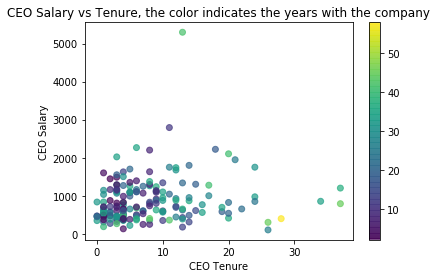

In [40]:
plt.scatter(df.ceoten,df.salary,c=df.comten,alpha=0.7,cmap='viridis') 
plt.xlabel("CEO Tenure")
plt.ylabel("CEO Salary")
plt.title("CEO Salary vs Tenure, the color indicates the years with the company as CEO")
plt.colorbar(); 

##### The longest tenure is around 40 years, further it can be inferred that most CEOs stay at the same position for longer period

# Understanding how does change in one year play a role in CEOs Salary with statistical analysis regression

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
# Create linear regression object
regr = linear_model.LinearRegression()
model1 = smf.ols('df.lsalary~df.ceoten+lmktval+lsales',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.lsalary   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     26.91
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           2.47e-14
Time:                        14:16:53   Log-Likelihood:                -128.12
No. Observations:                 177   AIC:                             264.2
Df Residuals:                     173   BIC:                             276.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5038      0.257     17.509      0.000       3.996       5.012
df.ceoten      0.0117      0.005      2.198      0.029       0.001       0.022
lmktval        0.1092      0.050      2.203      0.029       0.011       0.207
lsales         0.1629      0.039      4.150      0.000       0.085       0.240
==============================================================================
Omnibus:                       25.596   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.522
Skew:                          -0.291   Prob(JB):                     1.51e-27
Kurtosis:                       7.051   Cond. No.                         95.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### It can be predicted with the given datbase we can predict the log of the salary of CEO with 30.6 % accuaracy when modeled with log of marketvalue and log of sales
###### Further it can be said that:
######  Log of the salary of the CEO will increase by 1.1% every year  
###### one unit increase in log of market value of the company effects the log of the salary by 10%
###### one unit increase in log of sales of the company effects the log of the salary by 16%

# Improving the model further with K-folds cross validation

In [153]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [265]:
nsim  =  5
X = pd.concat([df.ceoten,df.lmktval,df.lsales], axis=1)
X = sm.add_constant(X)
y = df.lsalary
y = y.values
Tvec = [len(df)]
kvec = [2,5,10]
nvec = [len(X.columns)]
X = X.values
holding_place_3b = np.zeros((nsim,len(Tvec),len(nvec),len(kvec)))
for kdx,k in enumerate(kvec):
    for ndx,n in enumerate(nvec):
        for tdx,T in enumerate(Tvec):
            for isim in range(nsim):
                mspe = np.zeros(k)
                for j in range(k):    
                        sample =  np.random.permutation(2*T)
                        train = sample[:int(T)]
                        test = sample[int(T):]
                        train_l = sample[:int((k-1-j)*T/k)]
                        train_u = sample[int((k-j)*T/k):]
                        train = np.concatenate((train_l,train_u),0)
                        test = sample[int((k-1-j)*T/k):int((k-j)*T/k)]
                        sample =  np.random.permutation(T)
                        train = sample[:int(T/2)]
                        test = sample[int(T/2):]
                        model = smf.OLS(y[train],X[train]).fit()
                        mspe [j] = ((y[test]-model.predict(X[test]))**2).mean()
                holding_place_3b[isim,tdx,ndx,kdx]=mspe.mean()
    print(model.summary())
    print("The values below are  mean and standarad deviation for k ",k)
    print(holding_place_3b.mean(0)[:,:,0])
    print(holding_place_3b.mean(0)[:,:,1])
    print(holding_place_3b.mean(0)[:,:,2])
    print()
    print()
    print(holding_place_3b.std(0)[:,:,0])
    print(holding_place_3b.std(0)[:,:,1])
    print(holding_place_3b.std(0)[:,:,2])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     12.77
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           5.93e-07
Time:                        16:26:07   Log-Likelihood:                -65.868
No. Observations:                  88   AIC:                             139.7
Df Residuals:                      84   BIC:                             149.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3259      0.423     10.235      0.0

#### The model with 5 simulation and k-fold of 5 in this case improves the accuracy of the model to 44.44 % 